# CMPINF 2100: Final Exam

## Arnab Dey Sarkar

### Assigned: Monday of Finals Week (Week 15)

### DUE: Saturday of Finals Week (Week 15) at 11:59PM EST.

You may add as many code and markdown cells as you see fit to answer the questions.

#### You are **NOT** allowed to collaborate with anyone on this exam!

By downloading this file, you fully agree and accept that you are NOT collaborating with anyone on this exam.  

### Overview

The final exam is focused on the primary concepts of the second half of the semester. You will fit multiple regression models and multiple binary classification models. You will interpret the coefficients of the models and select the best performing model for each application.

You MUST download the 2 CSV files provided on Canvas and save them to the same working directory as this Jupyter notebook.

## Import modules

The "big 4" modules that we have used throughout the semester are imported in for you below.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import seaborn as sns

The relevant additional methods and functions that you will use in this exam are imported within the questions.

## Problem 1: Regression - 50 points

A data set is read in for you in the cell below. The data set consists of 5 continuous inputs, `x1` through `x5`, and a continuous response, `y`.

In [2]:
url_1 = 'final_prob01.csv'

df1 = pd.read_csv(url_1)

### 1a)
How many rows are in the data set? Double check the data types associated with each of the variables.

#### 1a) - SOLUTION

In [4]:
df1.shape[0]

110

110 rows.

In [26]:
df1.dtypes

x1    float64
x2    float64
x3    float64
x4    float64
x5    float64
y     float64
dtype: object

### 1b)
What are the means, standard deviations, min and max values for each of the variables? Visualize the summary statistics with boxplots. Are the variables all roughly covering the same range?

#### 1b) - SOLUTION

In [11]:
df1_feat = df1.drop('y', axis=1)

In [12]:
df1_feat.describe()

,x1,x2,x3,x4,x5
count,110.000000,110.000000,110.000000,110.000000,110.000000
mean,-0.035361,0.029356,0.034077,0.206676,-0.016708
std,1.105884,1.000596,1.158145,1.085244,0.927250
min,-3.136652,-2.725713,-2.427799,-1.879309,-2.042584
25%,-0.860105,-0.652197,-0.801266,-0.532813,-0.604332
50%,-0.113053,0.043325,0.064104,0.281610,-0.007597
75%,0.607403,0.666692,0.848492,0.983076,0.617831
max,2.916081,2.714255,2.492980,2.397799,3.289022


In [13]:
df1.y.describe()

count    110.000000
mean      -0.015383
std        3.146428
min      -10.627677
25%       -1.225560
50%        0.293134
75%        1.510491
max        7.623098
Name: y, dtype: float64

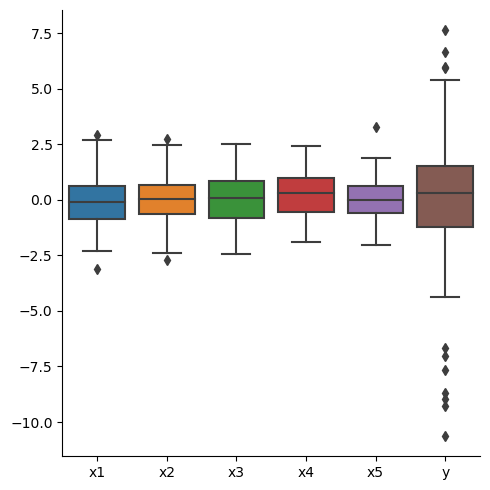

In [27]:
sns.catplot(data=df1, kind='box')

plt.show()

Yes, roughly the ranges are same. The last one is little big.

### 1c)
Are the inputs highly correlated or anticorrelated with each other?

#### 1c) - SOLUTION

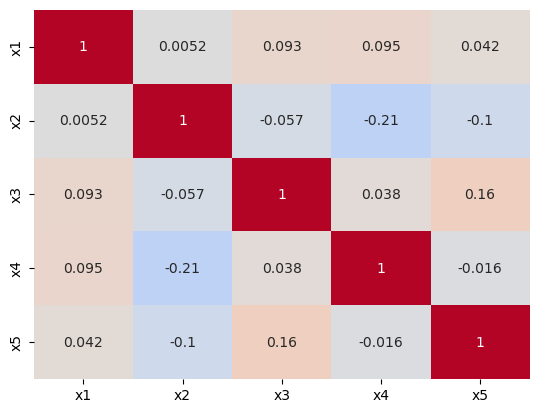

In [20]:
fig, ax = plt.subplots()

sns.heatmap(data = df1_feat.corr(numeric_only=True),
            vmin=-1, vmax=1, center=0, 
            annot=True, annot_kws={'fontsize': 10},
            cmap='coolwarm', cbar=False,
            ax=ax)

plt.show()

They are correlated e.g., (x3,x5) and (x2,x4) are correlated positively and negatively respectively.

### 1d)
Create scatter plots between the response, `y`, and each of the 4 continuous inputs. 

#### 1d) - SOLUTION

In [21]:
input_names = df1.drop(columns=['y']).columns
lf1= df1.copy().\
reset_index().\
rename(columns={'index': 'rowid'}).\
melt(id_vars=['rowid', 'y'], value_vars=input_names, ignore_index=True)

In [22]:
lf1

,rowid,y,variable,value
0,0,-0.380343,x1,0.426148
1,1,1.137283,x1,-1.170112
2,2,5.943899,x1,-1.320624
3,3,-0.236591,x1,0.370071
4,4,1.528802,x1,-0.962987
...,...,...,...,...
545,105,0.864300,x5,0.049433
546,106,-0.016731,x5,0.183100
547,107,4.708666,x5,0.618717
548,108,2.402124,x5,0.924023


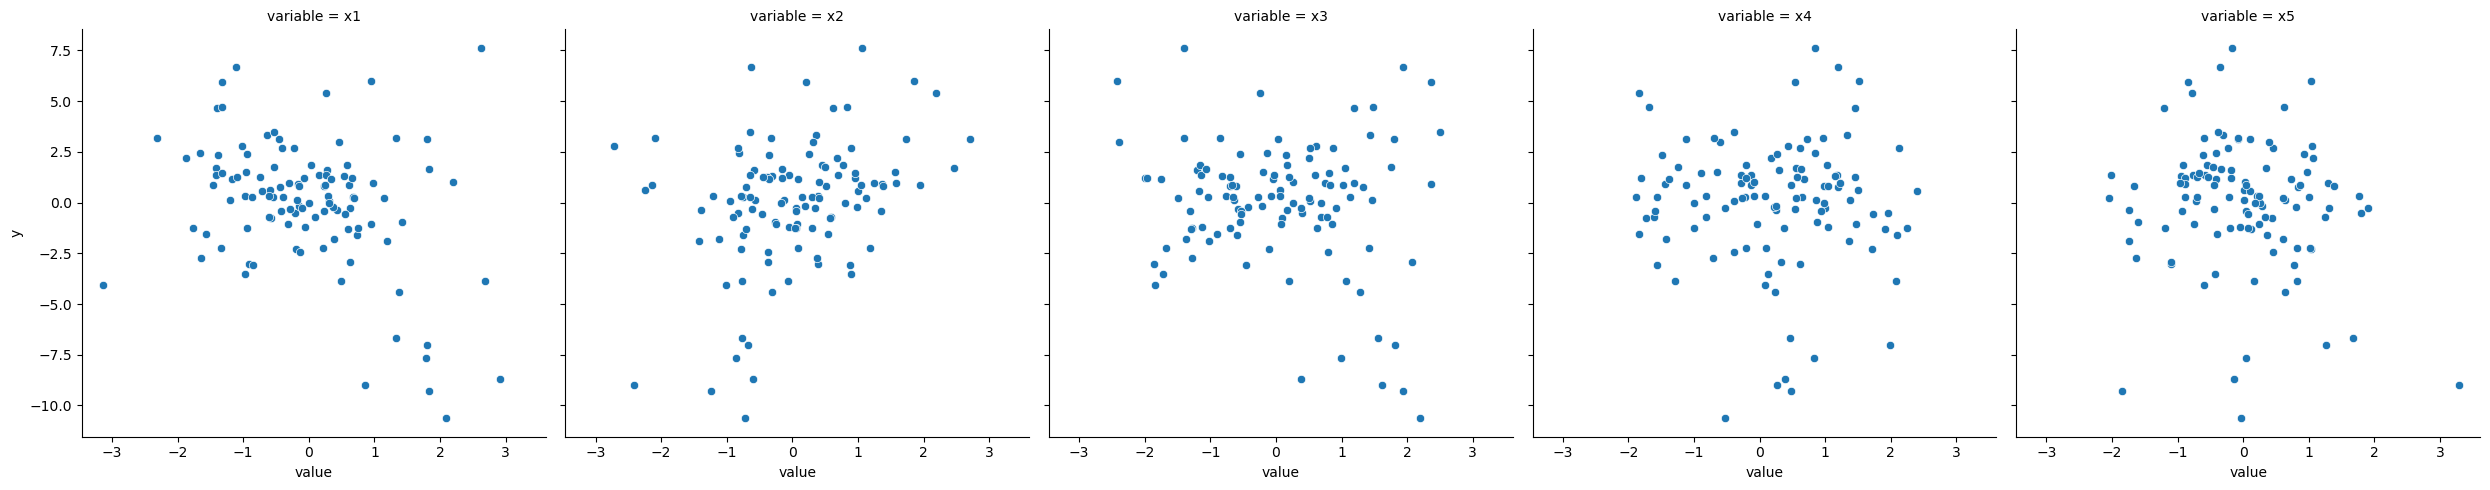

In [25]:
sns.relplot(data=lf1, x='value', y='y', col='variable')

plt.show()

Did you mean 5 inputs in the question?

### 1e)
You will fit 3 linear models using `statsmodels`. The `statsmodels` formula api is imported in for you below.

In [28]:
import statsmodels.formula.api as smf

You must fit the following linear models:

* Linear additive features
* All MAIN EFFECT linear features AND ALL pair-wise interactions between the inputs
* All MAIN EFFECT linear features, ALL pair-wise interactions, ALL three-way (triplet) interactions, and ALL 4-way interactions between the inputs.

Assign the model with linear additive terms to the object, `fit1_add`. Assign the model with up to all pair-wise interactions to the object, `fit1_pairs`. Assign the model with up to all 4-way interactions between the inputs to the object `fit1_4way`.  

Display the summary of each model to the screen.

**HINT**: Remember the `**` operator can help create interactions in the formula interface...  

#### 1e) - SOLUTION

In [29]:
fit1_add= smf.ols(formula='y~x1+x2+x3+x4+x5', data=df1).fit()
fit1_pairs= smf.ols(formula='y~(x1+x2+x3+x4+x5)**2', data=df1).fit()
fit1_4way= smf.ols(formula='y~(x1+x2+x3+x4+x5)**4', data=df1).fit()

In [31]:
print(fit1_add.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.247
Model:                            OLS   Adj. R-squared:                  0.211
Method:                 Least Squares   F-statistic:                     6.840
Date:                Wed, 13 Dec 2023   Prob (F-statistic):           1.49e-05
Time:                        23:36:13   Log-Likelihood:                -266.03
No. Observations:                 110   AIC:                             544.1
Df Residuals:                     104   BIC:                             560.3
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.1259      0.272     -0.462      0.6

In [32]:
print(fit1_pairs.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.889
Model:                            OLS   Adj. R-squared:                  0.871
Method:                 Least Squares   F-statistic:                     50.17
Date:                Wed, 13 Dec 2023   Prob (F-statistic):           4.20e-38
Time:                        23:36:44   Log-Likelihood:                -160.79
No. Observations:                 110   AIC:                             353.6
Df Residuals:                      94   BIC:                             396.8
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.1260      0.117      1.075      0.2

In [33]:
print(fit1_4way.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.911
Model:                            OLS   Adj. R-squared:                  0.877
Method:                 Least Squares   F-statistic:                     26.94
Date:                Wed, 13 Dec 2023   Prob (F-statistic):           2.52e-30
Time:                        23:37:15   Log-Likelihood:                -148.64
No. Observations:                 110   AIC:                             359.3
Df Residuals:                      79   BIC:                             443.0
Df Model:                          30                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept       0.1729      0.123      1.410      

### 1f)
The additive and pair-wise interaction models are subsets of the model with up to all 4-way interactions. Thus, all three models have some features in common. Which features are statistically significant (based on the 5% significance level, thus using the 95% confidence interval) in the three models? Are any features significant in all three models?

To help, the cell below defines the `my_coefplot()` function to visualize coefficient estimates and confidence intervals.

In [34]:
def my_coefplot(mod, figsize_use=(10, 4)):
    fig, ax = plt.subplots(figsize=figsize_use)
    
    ax.errorbar( y=mod.params.index,
                 x=mod.params,
                 xerr = 2 * mod.bse,
                 fmt='o', color='k', ecolor='k', elinewidth=2, ms=10)
    
    ax.axvline(x=0, linestyle='--', linewidth=3.5, color='grey')
    
    ax.set_xlabel('coefficient value')
    
    plt.show()

#### 1f) - SOLUTION

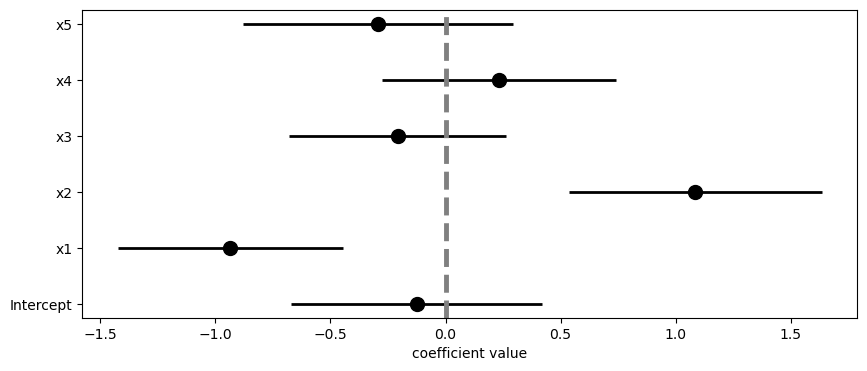

In [35]:
my_coefplot(fit1_add)

x1 and x2 are significant.

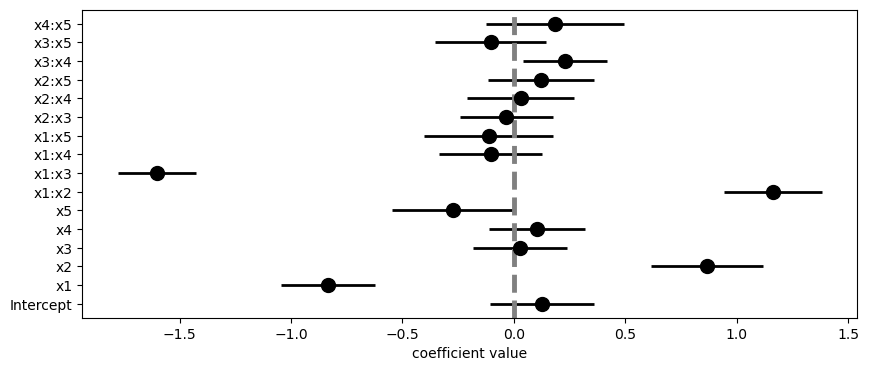

In [36]:
my_coefplot(fit1_pairs)

x1, x1:x3, x1:x2 and x2 are significant.

### 1g)
Which of the three models is considered to be the best performing model based on R-squared? Your assessment should be based on the complete data set used to fit the models.

#### 1g) - SOLUTION

In [37]:
fit1_add.rsquared

0.2474728891878183

In [38]:
fit1_pairs.rsquared

0.888962967855327

In [39]:
fit1_4way.rsquared

0.9109676322235685

fit_4way is the best.

### 1h)
Your assessment in 1g) was based just on the training set. You will now use cross-validation to train and assess the three models. You may accomplish this task one of several different ways. You may define your own function which executes the data splitting via scikit-learn functions, but uses statsmodels for the model fitting and testing within each fold. Alternatively, you may use scikit-learn functions to manage the cross-validation for you.


The cell below imports methods from scikit-learn and patsy to allow you to train and compare linear regression models with cross-validation. Again, you may define your own function and use statsmodels for the modeling portions.

In [41]:
from patsy import dmatrices

from sklearn.linear_model import LinearRegression

from sklearn.model_selection import KFold

from sklearn.model_selection import cross_val_score

Regardless of how you choose to execute this task, you must use 5-fold cross-validation to train and assess the three models you fit previously. You must compare the models via Root Mean Squared Error (RMSE) performance metric. If you are using `cross_val_score()` to manage the cross-validation, you must use the `neg_root_mean_squared_error` scoring function (the negative of the Root Mean Squared Error (RMSE) ). 

Which model is the best based on 5-fold cross-validation?

**IMPORTANT**: Do **NOT** standardize the features before performing the cross-validation for the exam. It is better to standardize the features WITHIN the folds, but you may ignore such actions for this final exam.

#### 1h) - SOLUTION

In [42]:
kf = KFold(n_splits=5, shuffle=True, random_state=101)

In [47]:
kf.get_n_splits()

5

In [48]:
sk_lm = LinearRegression(fit_intercept=False)

In [49]:
formula_list = ['y ~ x1 + x2 + x3 + x4 + x5',
                'y ~ (x1 + x2 + x3 + x4 + x5)**2',
                'y ~ (x1 + x2 + x3 + x4 + x5)**4']

In [50]:
def lm_cross_val_score(mod_name, a_formula, init_mod, the_data, cv):
    # create the feature and output arrays using the formula
    y, X = dmatrices( a_formula, data=the_data )
    
    # train and test within each fold - return the test set scores
    # rsquared
    test_r2 = cross_val_score( init_mod, X, y.ravel(), cv=cv )
    # rmse
    test_rmse = -cross_val_score( init_mod, X, y.ravel(), cv=cv, scoring='neg_root_mean_squared_error' )
    
    # book keeping
    res_df=pd.DataFrame({'R-squared': test_r2,
                         'RMSE': test_rmse})
    
    res_df['fold_id'] = res_df.index + 1
    res_df['model_name'] = mod_name
    res_df['model_formula'] = a_formula
    res_df['num_coefs'] = X.shape[1]
    
    return res_df

In [56]:
cv_score_list = []

for m in range( len(formula_list) ):
    
    cv_score_list.append( lm_cross_val_score(m, formula_list[m], init_mod=sk_lm, the_data=df1, cv=kf) )

In [57]:
cv_score_df=pd.concat( cv_score_list, ignore_index=True )

In [58]:
cv_score_df

,R-squared,RMSE,fold_id,model_name,model_formula,num_coefs
0,-0.297131,3.056565,1,0,y ~ x1 + x2 + x3 + x4 + x5,6
1,0.051897,2.686559,2,0,y ~ x1 + x2 + x3 + x4 + x5,6
2,0.277405,2.848732,3,0,y ~ x1 + x2 + x3 + x4 + x5,6
3,0.282378,3.030188,4,0,y ~ x1 + x2 + x3 + x4 + x5,6
4,0.194301,2.755688,5,0,y ~ x1 + x2 + x3 + x4 + x5,6
5,0.788436,1.234420,1,1,y ~ (x1 + x2 + x3 + x4 + x5)**2,16
6,0.848146,1.075182,2,1,y ~ (x1 + x2 + x3 + x4 + x5)**2,16
7,0.814272,1.444251,3,1,y ~ (x1 + x2 + x3 + x4 + x5)**2,16
8,0.869747,1.290968,4,1,y ~ (x1 + x2 + x3 + x4 + x5)**2,16
9,0.822160,1.294669,5,1,y ~ (x1 + x2 + x3 + x4 + x5)**2,16


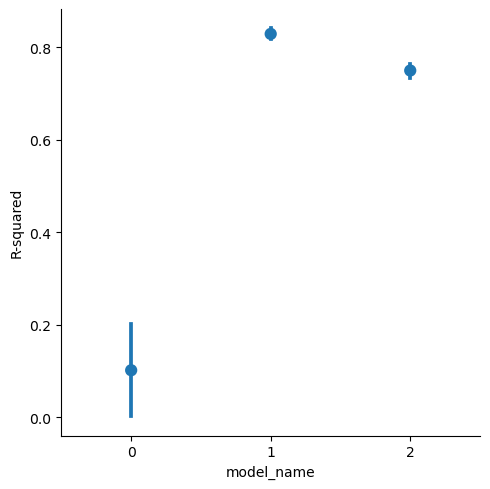

In [54]:
sns.catplot(data = cv_score_df, x='model_name', y='R-squared', kind='point', join=False,
            errorbar=('ci', 68))

plt.show()

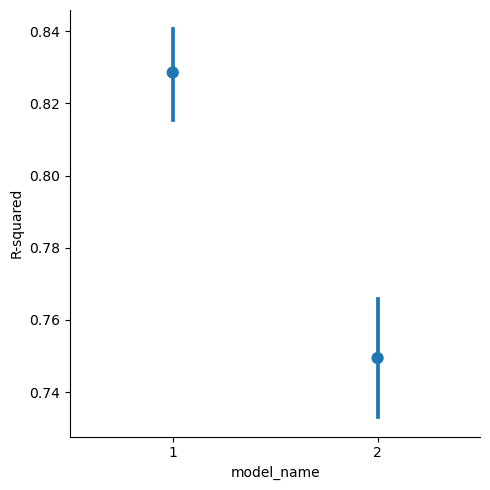

In [60]:
sns.catplot(data = cv_score_df.loc[ cv_score_df.model_name > 0, : ], 
            x='model_name', y='R-squared', kind='point', join=False,
            errorbar=('ci', 68))

plt.show()

fit1_add is the best based on the training set.

### BONUS: Problem 01 - 5 points
Regardless of your answer in 1h), you will now fit the model with up to all pair-wise interactions using LASSO regression. You MUST tune the `alpha` parameter (the regularization strength) using 5-fold cross-validation. You do not need to standardize the features for the exam and you may use the built-in cross-validation method for Lasso which is imported in for you below.

In [61]:
from sklearn.linear_model import LassoCV

You must try 101 values between 0.0001 and 10000 defined in the LOG-SPACE for the `alpha` parameter. Assign the result to the `lasso_cv_1` object.

To receive full BONUS, you must display the following:

* The optimal `alpha` parameter value according to 5-fold cross-validation.
* The coefficient estimated associated with the optimal or best lasso model. How many coefficients have been "TURNED OFF" and set to zero?

#### BONUS: Problem 01 - SOLUTION

In [62]:
y_1, X_1 = dmatrices('y ~ ( x1+x2+x3+x4+x5)**2', data = df1)

In [63]:
#alpha_grid = np.exp( np.linspace(-4, 4, num=101) )
alpha_grid = np.logspace(-4, 4, 101)

In [65]:
lasso_cv1 = LassoCV( alphas=alpha_grid, fit_intercept=False, max_iter=25001, cv=kf).fit( X_1, y_1.ravel() )

In [66]:
# The optimal alpha value
lasso_cv1.alpha_

0.07585775750291836

In [69]:
# The coefficient estimates associated with the tuned alpha value are:
lasso_cv1.coef_==0

array([False, False, False,  True, False, False, False, False, False,
        True,  True,  True, False, False, False,  True])

5 coefficients have been "TURNED OFF".

## Problem 2 - Binary classification - 50 points

A data set is read in for you below. It consists of 5 continuous inputs, `x1` through `x5`, and a binary outcome `y`.

In [70]:
url_2 = 'final_prob02.csv'

df2 = pd.read_csv(url_2)

### 2a)
How many rows are in the data set? What is the data type associated with the binary outcome `y`?

#### 2a) - SOLUTION

In [71]:
df2.shape

(220, 6)

220 rows

In [72]:
df2.dtypes

x1    float64
x2    float64
x3    float64
x4    float64
x5    float64
y       int64
dtype: object

'y' has integer data type.

### 2b)
What are the unique values of `y` and how many rows are associated with each unique value?

#### 2b) - SOLUTION

In [73]:
df2.y.value_counts()

0    118
1    102
Name: y, dtype: int64

### 2c)
Visualize the summary statistics associated with the input features using boxplots. Do the inputs roughly cover the same range?

#### 2c) - SOLUTION

In [75]:
df2_feat = df2.drop('y', axis=1)

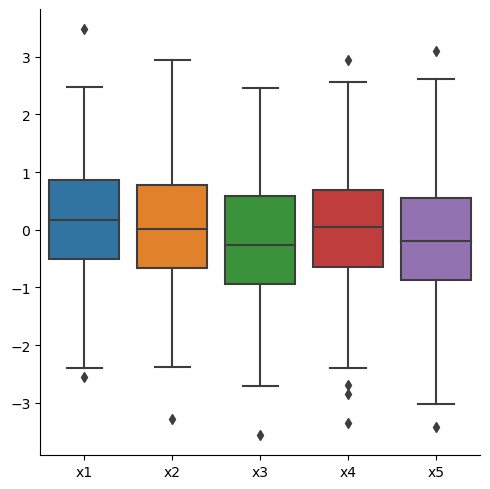

In [78]:
sns.catplot(data=df2_feat, kind='box')

plt.show()

Yes, the inputs roughly cover the same range.

In [80]:
## This one is for me only. Tried to apply the same code as problem 1 for logistic.
input_names = df2.drop(columns=['y']).columns
lf2= df2.copy().\
reset_index().\
rename(columns={'index': 'rowid'}).\
melt(id_vars=['rowid', 'y'], value_vars=input_names, ignore_index=True)

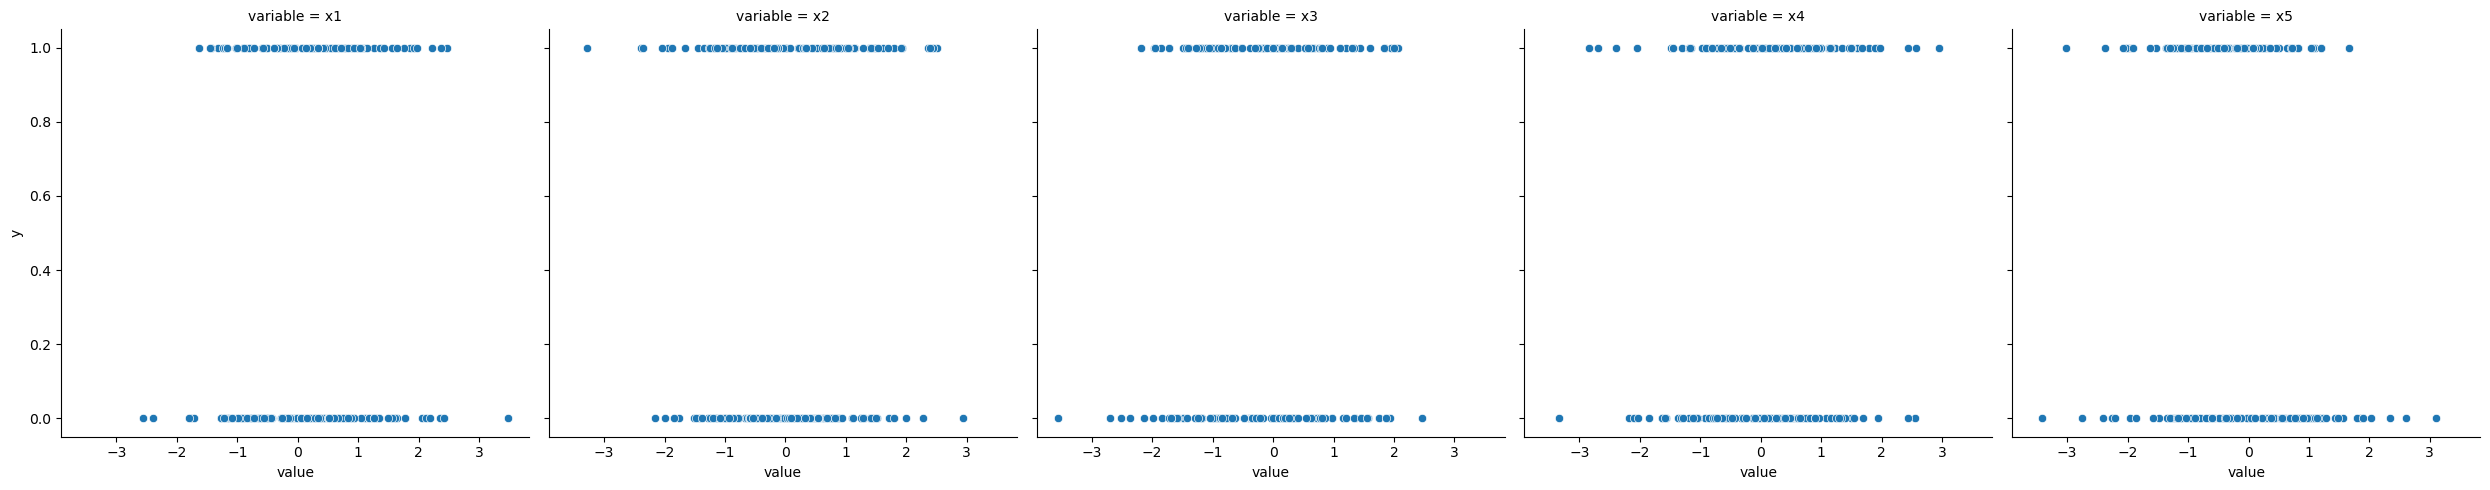

In [82]:
## This one is for me only. Tried to apply the same code as problem 1 for logistic.

sns.relplot(data=lf2, x='value', y='y', col='variable')

plt.show()

### 2d)
Are the inputs highly correlated or anticorrelated with each other?

#### 2d) - SOLUTION

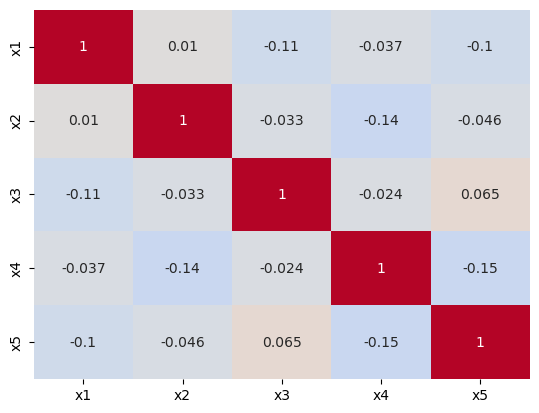

In [79]:
fig, ax = plt.subplots()

sns.heatmap(data = df2_feat.corr(numeric_only=True),
            vmin=-1, vmax=1, center=0, 
            annot=True, annot_kws={'fontsize': 10},
            cmap='coolwarm', cbar=False,
            ax=ax)

plt.show()

### 2e)
You will fit three logistic regression models to the data. You must use the `statsmodels` formula api to fit the models.

You must fit the following logistic regression models:

* Linear additive features
* All MAIN EFFECT linear features AND ALL pair-wise interactions between the inputs
* All MAIN EFFECT linear features, ALL pair-wise interactions, ALL three-way (triplet) interactions, and ALL 4-way interactions between the inputs.

Assign the model with linear additive terms to the object, `fit2_add`. Assign the model with up to all pair-wise interactions to the object, `fit2_pairs`. Assign the model with up to all 4-way interactions between the inputs to the object `fit2_4way`.  

Display the summary of each model to the screen.

**HINT**: Remember the `**` operator can help create interactions in the formula interface...  

#### 2e) - SOLUTION

In [87]:
fit2_add = smf.logit(formula='y ~ x1 + x2 + x3 + x4 + x5', data=df2).fit()
print(fit2_add.summary())

Optimization terminated successfully.
         Current function value: 0.658346
         Iterations 5
                           Logit Regression Results                           
Dep. Variable:                      y   No. Observations:                  220
Model:                          Logit   Df Residuals:                      214
Method:                           MLE   Df Model:                            5
Date:                Thu, 14 Dec 2023   Pseudo R-squ.:                 0.04657
Time:                        00:21:21   Log-Likelihood:                -144.84
converged:                       True   LL-Null:                       -151.91
Covariance Type:            nonrobust   LLR p-value:                   0.01470
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.2548      0.147     -1.730      0.084      -0.543       0.034
x1            -0.0075      0.

In [88]:
fit2_pairs = smf.logit(formula='y ~ (x1 + x2 + x3 + x4 + x5)**2', data=df2).fit()
print(fit2_pairs.summary())

Optimization terminated successfully.
         Current function value: 0.454774
         Iterations 8
                           Logit Regression Results                           
Dep. Variable:                      y   No. Observations:                  220
Model:                          Logit   Df Residuals:                      204
Method:                           MLE   Df Model:                           15
Date:                Thu, 14 Dec 2023   Pseudo R-squ.:                  0.3414
Time:                        00:21:21   Log-Likelihood:                -100.05
converged:                       True   LL-Null:                       -151.91
Covariance Type:            nonrobust   LLR p-value:                 2.563e-15
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.4839      0.201     -2.406      0.016      -0.878      -0.090
x1            -0.0237      0.

In [89]:
fit2_4way = smf.logit(formula='y ~ (x1 + x2 + x3 + x4 + x5)**4', data=df2).fit()
print(fit2_4way.summary())

Optimization terminated successfully.
         Current function value: 0.416135
         Iterations 8
                           Logit Regression Results                           
Dep. Variable:                      y   No. Observations:                  220
Model:                          Logit   Df Residuals:                      189
Method:                           MLE   Df Model:                           30
Date:                Thu, 14 Dec 2023   Pseudo R-squ.:                  0.3973
Time:                        00:21:22   Log-Likelihood:                -91.550
converged:                       True   LL-Null:                       -151.91
Covariance Type:            nonrobust   LLR p-value:                 7.724e-13
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept      -0.4066      0.224     -1.815      0.069      -0.845       0.032
x1             -0.0709    

### 2f)
The additive and pair-wise interaction models are subsets of the model with up to all 4-way interactions. Thus, all three models have some features in common. Which features are statistically significant (based on the 5% significance level, thus using the 95% confidence interval) in the three models? Are any features significant in all three models?

#### 2f) - SOLUTION

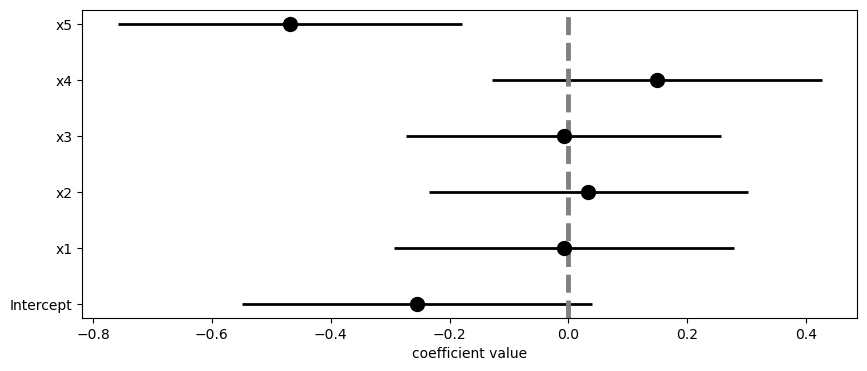

In [90]:
my_coefplot(fit2_add)

x5 is significant.

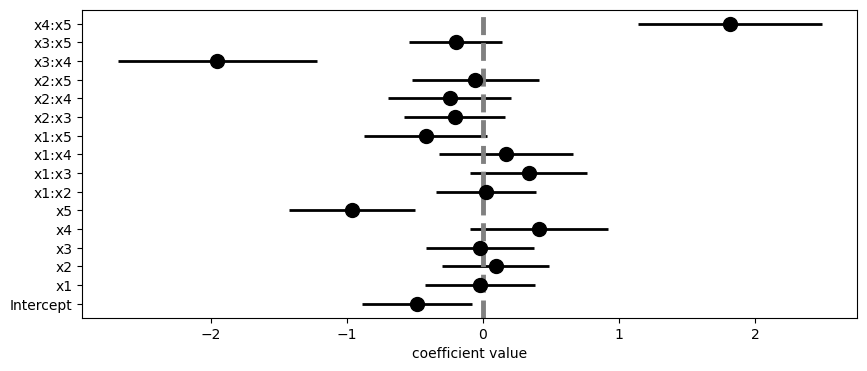

In [91]:
my_coefplot(fit2_pairs)

Intercept, x5, x3:x4, x4:x5 are significant.

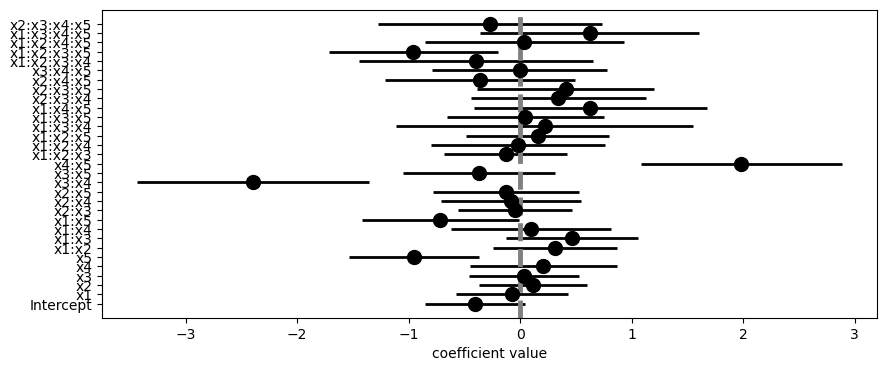

In [92]:
my_coefplot(fit2_4way)

x5, x3:x4, x4:x5, x1:x2:x3:x5 are significant.

### 2g)
You will now use stratified 5-fold cross-validation to train and assess the three logistic regression models. You must use scikit-learn methods for assessing the model performance via cross-validation. The relevant methods from sklearn are imported for you in the cell below.

In [93]:
from sklearn.linear_model import LogisticRegression

from sklearn.model_selection import StratifiedKFold

You must set the `penalty` argument to `'none'` for all three models. You should use the `cross_val_score()` function to train and assess the model performance based on the `'accuracy'` scoring function. You do not need to standardize the features for the exam.

Which of the three models is considered the best performing model based on cross-validation?

#### 2g) - SOLUTION

In [94]:
sk_min_loss = LogisticRegression(penalty=None, solver='lbfgs', fit_intercept=False, max_iter=25001)

In [100]:
kf = StratifiedKFold(n_splits=5, shuffle=True, random_state=9483156)

In [101]:
def logistic_cross_val_score(mod_name, a_formula, init_mod, data_df, cv):
    # create the feature and output arrays using the formula
    y, X = dmatrices( a_formula, data=data_df )
    
    # train and test within each fold - return the test set scores
    test_res = cross_val_score( init_mod, X, y.ravel(), cv=cv )
    
    # book keeping
    res_df = pd.DataFrame({'Accuracy': test_res})
    res_df['fold_id'] = res_df.index + 1
    res_df['model_name'] = mod_name
    res_df['model_formula'] = a_formula
    res_df['num_coefs'] = X.shape[1]
    
    return res_df

In [102]:
cv_score_list = []

for m in range(len(formula_list)):
    
    cv_score_list.append( logistic_cross_val_score(m, formula_list[m], init_mod=sk_min_loss, data_df=df2, cv=kf) )

In [103]:
cv_score_df = pd.concat( cv_score_list, ignore_index=True )

In [104]:
cv_score_df

,Accuracy,fold_id,model_name,model_formula,num_coefs
0,0.568182,1,0,y ~ x1 + x2 + x3 + x4 + x5,6
1,0.659091,2,0,y ~ x1 + x2 + x3 + x4 + x5,6
2,0.522727,3,0,y ~ x1 + x2 + x3 + x4 + x5,6
3,0.590909,4,0,y ~ x1 + x2 + x3 + x4 + x5,6
4,0.590909,5,0,y ~ x1 + x2 + x3 + x4 + x5,6
5,0.613636,1,1,y ~ (x1 + x2 + x3 + x4 + x5)**2,16
6,0.795455,2,1,y ~ (x1 + x2 + x3 + x4 + x5)**2,16
7,0.590909,3,1,y ~ (x1 + x2 + x3 + x4 + x5)**2,16
8,0.772727,4,1,y ~ (x1 + x2 + x3 + x4 + x5)**2,16
9,0.704545,5,1,y ~ (x1 + x2 + x3 + x4 + x5)**2,16


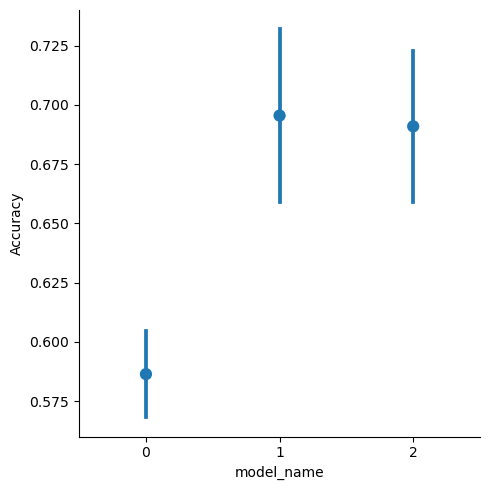

In [105]:
sns.catplot(data = cv_score_df, x='model_name', y='Accuracy', kind='point', join=False,
            errorbar=('ci', 68))

plt.show()

Model 1 is more accurate.

### Bonus: Problem 02 - 5 points
Regardless of your answer to 2g), you will train a logistic regression model with up to all pair-wise interactions applying the LASSO penalty. You will tune the `C` parameter using stratified 5-fold cross-validation. You may use the built-in cross-validation method for logistic regression, which is imported in for you below.

In [106]:
from sklearn.linear_model import LogisticRegressionCV

You must set the `penalty` argument to `l1` in `LogisticRegressionCV()` and you must consider 101 `C` parameter values between 0.0001 and 10000 in the LOG-SPACE.

Assign the result to the `lasso_cv_2` object.

To receive full BONUS, you must display the following:

* The optimal `C` parameter value according to stratified 5-fold cross-validation.
* The coefficient estimated associated with the optimal or best lasso model. How many coefficients have been "TURNED OFF" and set to zero?

#### BONUS: Problem 02 - SOLUTION

In [107]:
y_2, X_2 = dmatrices(formula_list[1], data=df2)

In [108]:
Cgrid = np.logspace(-4, 4, 101)

In [109]:
lasso_cv2 = LogisticRegressionCV(penalty='l1', Cs=Cgrid, solver='saga', cv=kf, max_iter=25001, fit_intercept=False).\
fit(X_2, y_2.ravel())

In [110]:
# The optimal alpha value
lasso_cv2.C_

array([0.83176377])

In [117]:
np.sum(lasso_cv2.coef_==0)

3

3 features are turned off.

## BONUS Problems

There are 2 bonus problem sthat require you to use methods introduced in the LAST MODULE (Week 14). Completing these BONUS problems may earn you a substantial amount of BONUS points.

## BONUS -  10 points

The Wisconsin Breast Cancer data set is imported in for you in the cell below. The data set is a classification data set, with the input features assigned to the `b_features` object and the binary outcome assigned to the `y_class` object. The `b_features` object is converted to a Pandas DataFrame for you and assigned to the `b_df` object.

In [118]:
from sklearn.datasets import load_breast_cancer

b_features, y_class = load_breast_cancer(return_X_y=True)

b_df = pd.DataFrame(b_features, columns=['X'+str(d).zfill(2) for d in range(b_features.shape[1])])

You must use stratified 5-fold cross-validation to tune a logistic regression model with the Elastic Net penalty. You **must** use Pipeline to properly standardize the features before training the logistic regression model. You should tune the `l1_ratio` and `C` parameter with grid search. The relevant methods are imported in for you below.

In [119]:
from sklearn.preprocessing import StandardScaler

from sklearn.pipeline import Pipeline

from sklearn.model_selection import GridSearchCV

In [ ]:
# add as many cells as you feel are necessary

In [ ]:
from sklearn.decomposition import PCA

In [ ]:
enet_to_fit = LogisticRegression(penalty='elasticnet', solver='saga', random_state=202, max_iter=25001, fit_intercept=True)
kf = StratifiedKFold(n_splits=5, shuffle=True, random_state=101)
kf.get_n_splits()

5

In [ ]:
enet_wflow_df = Pipeline(steps=[('std_inputs', StandardScaler()), 
                                 ('enet', enet_to_fit)] )

In [ ]:
enet_wflow_df

Pipeline(steps=[('std_inputs', StandardScaler()),
                ('enet',
                 LogisticRegression(max_iter=25001, penalty='elasticnet',
                                    random_state=202, solver='saga'))])

In [ ]:
enet_grid = {'enet__C': np.exp( np.linspace(-10, 10, num=17) ),
             'enet__l1_ratio': np.linspace(0, 1, num=3)}

In [ ]:
enet_search = GridSearchCV(enet_wflow_df, param_grid=enet_grid, cv=kf)

In [ ]:
enet_search_results = enet_search.fit( b_df, y_class )

In [ ]:
enet_search_results.best_params_

{'enet__C': 1.0, 'enet__l1_ratio': 0.0}

It gives us ridge and optimal enet_C =1. I think that the features are correlated.

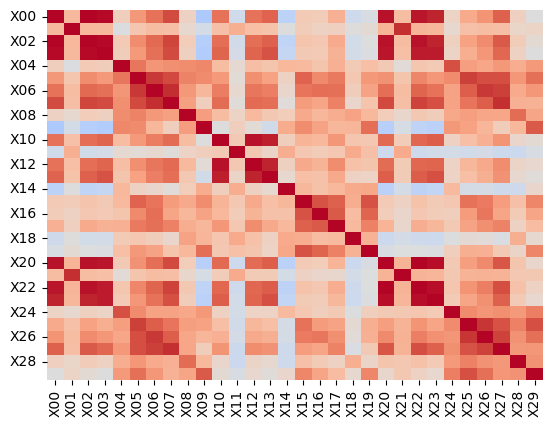

In [134]:
fig, ax = plt.subplots()

sns.heatmap(data = b_df.corr(numeric_only=True),
            vmin=-1, vmax=1, center=0, 
            cmap='coolwarm', cbar=False,
            ax=ax)

plt.show()

In [135]:
enet_search_results.best_score_

0.98067070330694

In [136]:
enet_search_results.best_estimator_.named_steps['enet'].coef_

array([[-0.37809511, -0.4013131 , -0.36426672, -0.44510658, -0.15923505,
         0.54132324, -0.84469506, -0.94795259,  0.07938503,  0.33028005,
        -1.27871416,  0.25731522, -0.68176975, -0.99061973, -0.27172273,
         0.75284081,  0.09586028, -0.32420811,  0.29600134,  0.66355806,
        -1.01686985, -1.29660093, -0.82002198, -0.99088331, -0.68311941,
         0.0377674 , -0.87098369, -0.92230109, -0.89249768, -0.4658588 ]])

In [137]:
enet_search_results.classes_

array([0, 1])

In [138]:
enet_search_results.best_estimator_.named_steps['enet'].coef_

array([[-0.37809511, -0.4013131 , -0.36426672, -0.44510658, -0.15923505,
         0.54132324, -0.84469506, -0.94795259,  0.07938503,  0.33028005,
        -1.27871416,  0.25731522, -0.68176975, -0.99061973, -0.27172273,
         0.75284081,  0.09586028, -0.32420811,  0.29600134,  0.66355806,
        -1.01686985, -1.29660093, -0.82002198, -0.99088331, -0.68311941,
         0.0377674 , -0.87098369, -0.92230109, -0.89249768, -0.4658588 ]])

### BONUS - 10 points

You must use stratified 5-fold cross-validation to tune Principal Component (PC) based logistic regression. You must tune the number of PCs to retain with the `penalty` term set to `'none'` in the logistic regression model. You **must** use Pipeline to properly standardize the features before performing PCA and training the logistic regression model. You should tune the `n_components` with grid search. The relevant methods are imported in for you below.

In [142]:
from sklearn.decomposition import PCA

In [175]:
model_to_fit = LogisticRegression(penalty=None, random_state=202, max_iter=25001, fit_intercept=True)


In [176]:
pc_wflow = Pipeline( steps=[('std_inputs', StandardScaler()), 
                                  ('pca', PCA()), 
                                  ('model', model_to_fit)] )

In [177]:
pc_wflow

Pipeline(steps=[('std_inputs', StandardScaler()), ('pca', PCA()),
                ('lasso',
                 LogisticRegression(max_iter=25001, penalty=None,
                                    random_state=202))])

In [184]:
pc_grid = {'pca__n_components': [3, 5, 7, 9, 11, 13, 15, 17]}

In [185]:
pc_search = GridSearchCV(pc_wflow, param_grid=pc_grid, cv=kf)

In [186]:
pc_search_results = pc_search.fit( b_df, y_class )

In [187]:
pc_search_results.best_params_

{'pca__n_components': 9}

In [188]:
pc_search_results.best_score_

0.9806551777674274

In [191]:
pc_search_results.best_estimator_.named_steps['lasso'].coef_

array([[-3.35448895,  1.88695258,  0.74307892,  0.78639694,  1.51749753,
         0.47381475, -0.32389271, -1.16517937, -2.19866715]])